In [211]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
from datetime import datetime, timedelta
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [212]:
#Loading COVID 19 latest dataset (Till Dec 5th 2020)

In [213]:
data_confirmed = pd.read_csv("data/time_series_covid19_confirmed_global.csv")
data_deaths = pd.read_csv("data/time_series_covid19_deaths_global.csv")
data_recovered = pd.read_csv("data/time_series_covid19_recovered_global.csv")

In [214]:
data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,45600,45723,45844,46116,46274,46516,46718,46837,46837,47072
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,35600,36245,36790,37625,38182,39014,39719,40501,41302,42148
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,79110,80168,81212,82221,83199,84152,85084,85927,86730,87502
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,6534,6610,6610,6712,6745,6790,6842,6904,6955,7005
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,14920,15008,15087,15103,15139,15251,15319,15361,15493,15536


In [215]:
data_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1737,1740,1752,1774,1795,1822,1841,1846,1846,1864
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,753,771,787,798,810,822,839,852,870,889
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2352,2372,2393,2410,2431,2447,2464,2480,2492,2501
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,76,76,76,76,76,76,76,77,77,78
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,341,342,345,346,348,350,351,352,353,354


In [216]:
data_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36232,36295,36709,36716,36831,36946,37218,37260,37260,37393
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,17352,17755,18152,18481,18849,19384,19912,20484,20974,21286
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,51334,51946,52568,53204,53809,54405,54990,55538,56079,56617
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,5649,5710,5710,5794,5873,5940,5988,6066,6130,6171
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,7617,7697,7763,7763,7851,7932,8139,8244,8299,8335


In [217]:
columns = data_confirmed.keys()
columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '11/26/20', '11/27/20', '11/28/20', '11/29/20', '11/30/20', '12/1/20',
       '12/2/20', '12/3/20', '12/4/20', '12/5/20'],
      dtype='object', length=323)

In [218]:
#Storing only the available dates 

In [219]:
dates_confirmed = data_confirmed.loc[:, columns[4]:columns[-1]]
dates_confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20
0,0,0,0,0,0,0,0,0,0,0,...,45600,45723,45844,46116,46274,46516,46718,46837,46837,47072
1,0,0,0,0,0,0,0,0,0,0,...,35600,36245,36790,37625,38182,39014,39719,40501,41302,42148
2,0,0,0,0,0,0,0,0,0,0,...,79110,80168,81212,82221,83199,84152,85084,85927,86730,87502
3,0,0,0,0,0,0,0,0,0,0,...,6534,6610,6610,6712,6745,6790,6842,6904,6955,7005
4,0,0,0,0,0,0,0,0,0,0,...,14920,15008,15087,15103,15139,15251,15319,15361,15493,15536


In [220]:
dates_deaths = data_deaths.loc[:, columns[4]:columns[-1]]
dates_deaths.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20
0,0,0,0,0,0,0,0,0,0,0,...,1737,1740,1752,1774,1795,1822,1841,1846,1846,1864
1,0,0,0,0,0,0,0,0,0,0,...,753,771,787,798,810,822,839,852,870,889
2,0,0,0,0,0,0,0,0,0,0,...,2352,2372,2393,2410,2431,2447,2464,2480,2492,2501
3,0,0,0,0,0,0,0,0,0,0,...,76,76,76,76,76,76,76,77,77,78
4,0,0,0,0,0,0,0,0,0,0,...,341,342,345,346,348,350,351,352,353,354


In [221]:
dates_recovered = data_recovered.loc[:, columns[4]:columns[-1]]
dates_recovered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20
0,0,0,0,0,0,0,0,0,0,0,...,36232,36295,36709,36716,36831,36946,37218,37260,37260,37393
1,0,0,0,0,0,0,0,0,0,0,...,17352,17755,18152,18481,18849,19384,19912,20484,20974,21286
2,0,0,0,0,0,0,0,0,0,0,...,51334,51946,52568,53204,53809,54405,54990,55538,56079,56617
3,0,0,0,0,0,0,0,0,0,0,...,5649,5710,5710,5794,5873,5940,5988,6066,6130,6171
4,0,0,0,0,0,0,0,0,0,0,...,7617,7697,7763,7763,7851,7932,8139,8244,8299,8335


In [222]:
#Analyzing data of only India

In [223]:
india_confirmed = data_confirmed.loc[data_confirmed['Country/Region'] == 'India', columns[4]:columns[-1]]
india_deaths = data_deaths.loc[data_deaths['Country/Region'] == 'India', columns[4]:columns[-1]]
india_recovered = data_recovered.loc[data_recovered['Country/Region'] == 'India', columns[4]:columns[-1]]

In [224]:
india_confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20
145,0,0,0,0,0,0,0,0,1,1,...,9309787,9351109,9392919,9431691,9462809,9499413,9534964,9571559,9608211,9644222


In [225]:
india_deaths

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20
145,0,0,0,0,0,0,0,0,0,0,...,135715,136200,136696,137139,137621,138122,138648,139188,139700,140182


In [226]:
india_recovered

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20
130,0,0,0,0,0,0,0,0,0,0,...,8718517,8759969,8802267,8847600,8889585,8932647,8973373,9016289,9058822,9100792


In [227]:
#Exploratory data analysis (EDA) to better understand the data set

In [229]:
#Calculating the total sum of the deaths, cases and recovered (Both for World and India)
dates = dates_confirmed.keys()
total_cases_worldwide = []
total_deaths_worldwide = []
mortality_rate = []
total_recovered_worldwide = []
india_confirmed_sum = []
india_deaths_sum = []


In [230]:
for i in range(len(dates)):
    sum_confirmed = dates_confirmed[dates[i]].sum()
    sum_death = dates_deaths[dates[i]].sum()
    sum_recovered = dates_recovered[dates[i]].sum()
    total_cases_worldwide.append(sum_confirmed)
    total_deaths_worldwide.append(sum_death)
    mortality_rate.append(sum_death / sum_confirmed)
    total_recovered_worldwide.append(sum_recovered)
    india_confirmed_sum.append(india_confirmed[dates[i]].sum())
    india_deaths_sum.append(india_deaths[dates[i]].sum())

In [231]:
#Total number of confirmed cases - world wide
sum_confirmed

66540034

In [232]:
#Total number of deaths - world wide
sum_death

1528868

In [233]:
#Total number of recoveries - world wide
sum_recovered

42789879

In [234]:
#Confirmed cases in India
india_confirmed_sum[len(india_confirmed_sum) - 1]

9644222

In [235]:
#Deaths in India
india_deaths_sum[len(india_deaths_sum) - 1]

140182

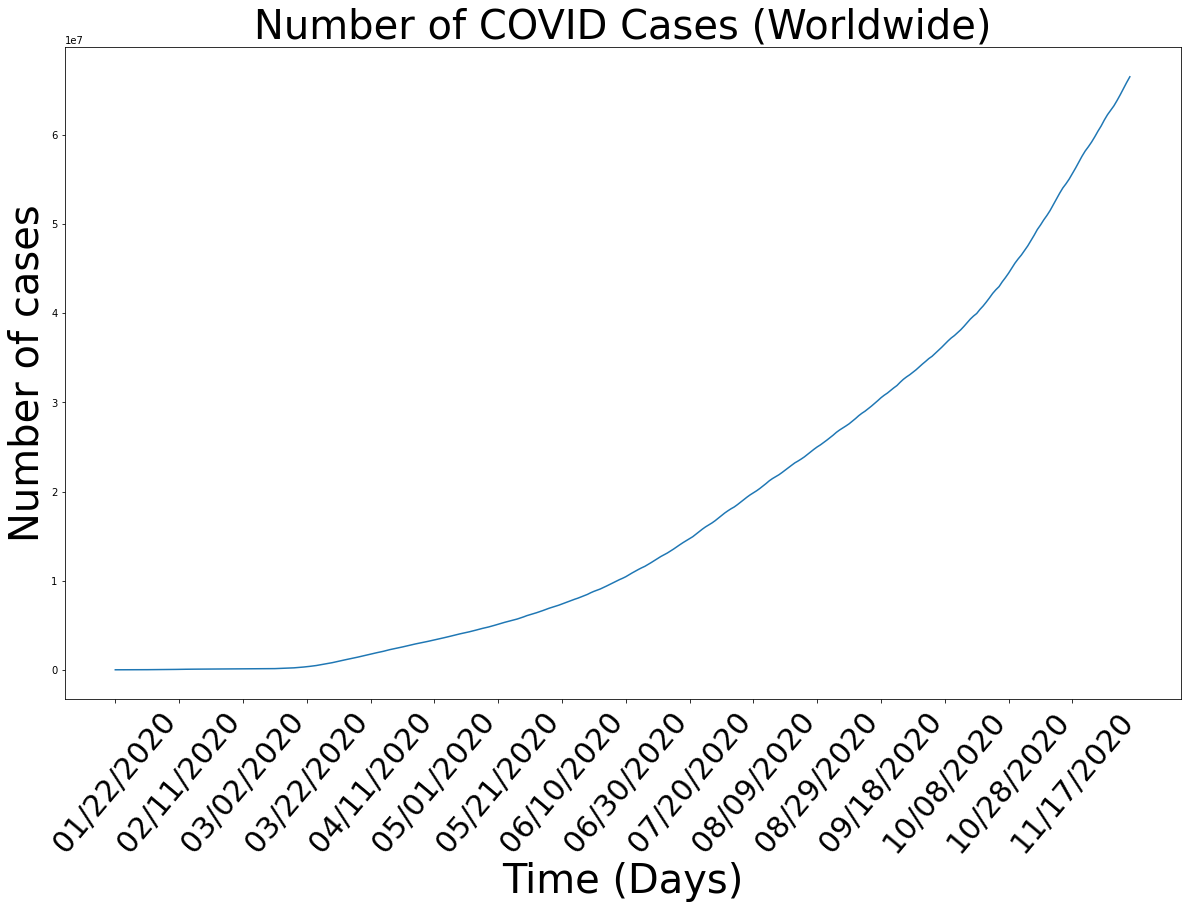

In [238]:
#Plotting figures 
days_in_future = 3
future_forcast = np.array([i for i in range(len(dates) + days_in_future)]).reshape(-1, 1)
start_date = datetime.strptime(dates[0], '%m/%d/%y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + timedelta(days=i)).strftime('%m/%d/%Y'))
adjusted_dates = future_forcast_dates[:-3]

#Number of cases over time
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_cases_worldwide)
plt.title('Number of COVID Cases (Worldwide)', size=40)
plt.xlabel('Time (Days)', size=40)
plt.ylabel('Number of cases', size=40)
plt.xticks(np.arange(0, len(adjusted_dates), 20), rotation=50, size=30)
plt.show()

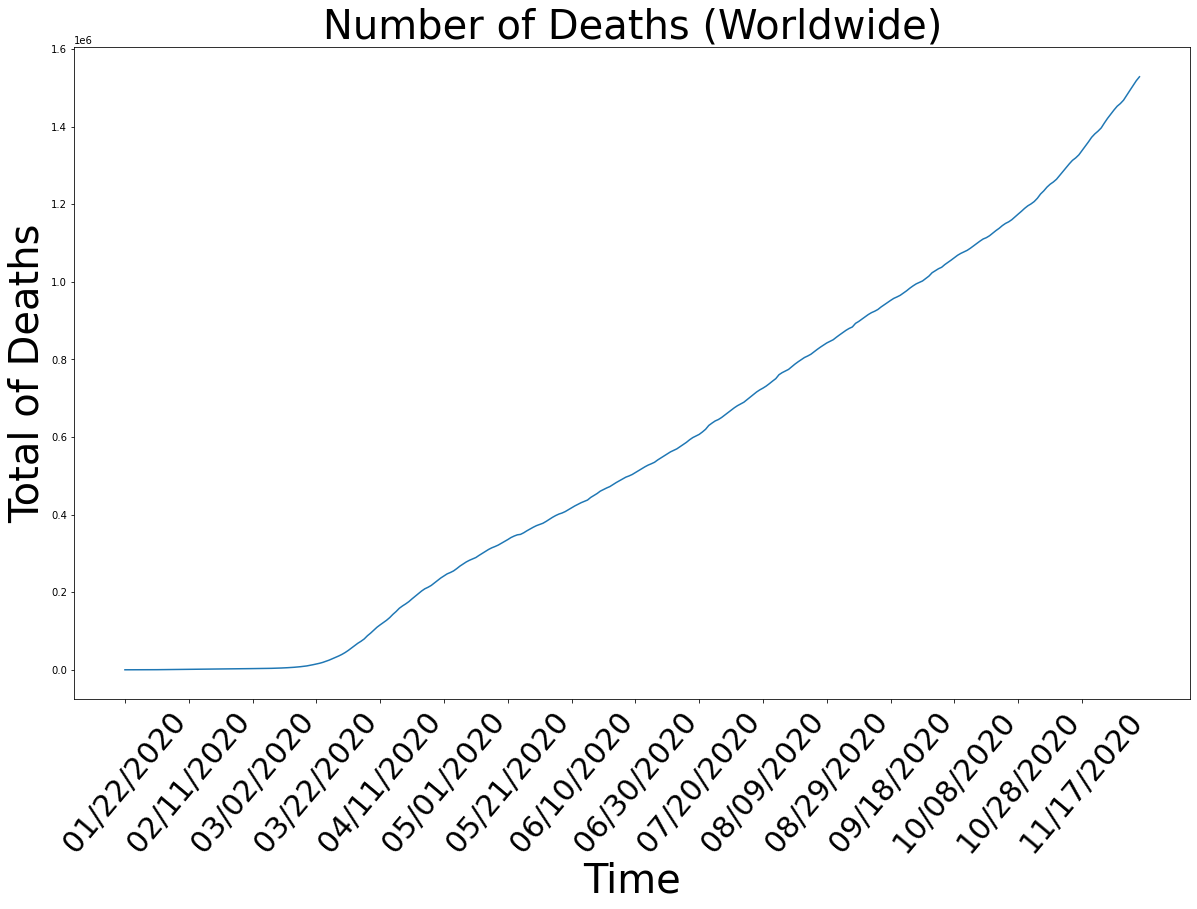

In [237]:
#Number of deaths over time
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths_worldwide)
plt.title('Number of Deaths (Worldwide)', size=40)
plt.xlabel('Time', size=40)
plt.ylabel('Total of Deaths', size=40)
plt.xticks(np.arange(0, len(adjusted_dates), 20), rotation=50, size=30)
plt.show()


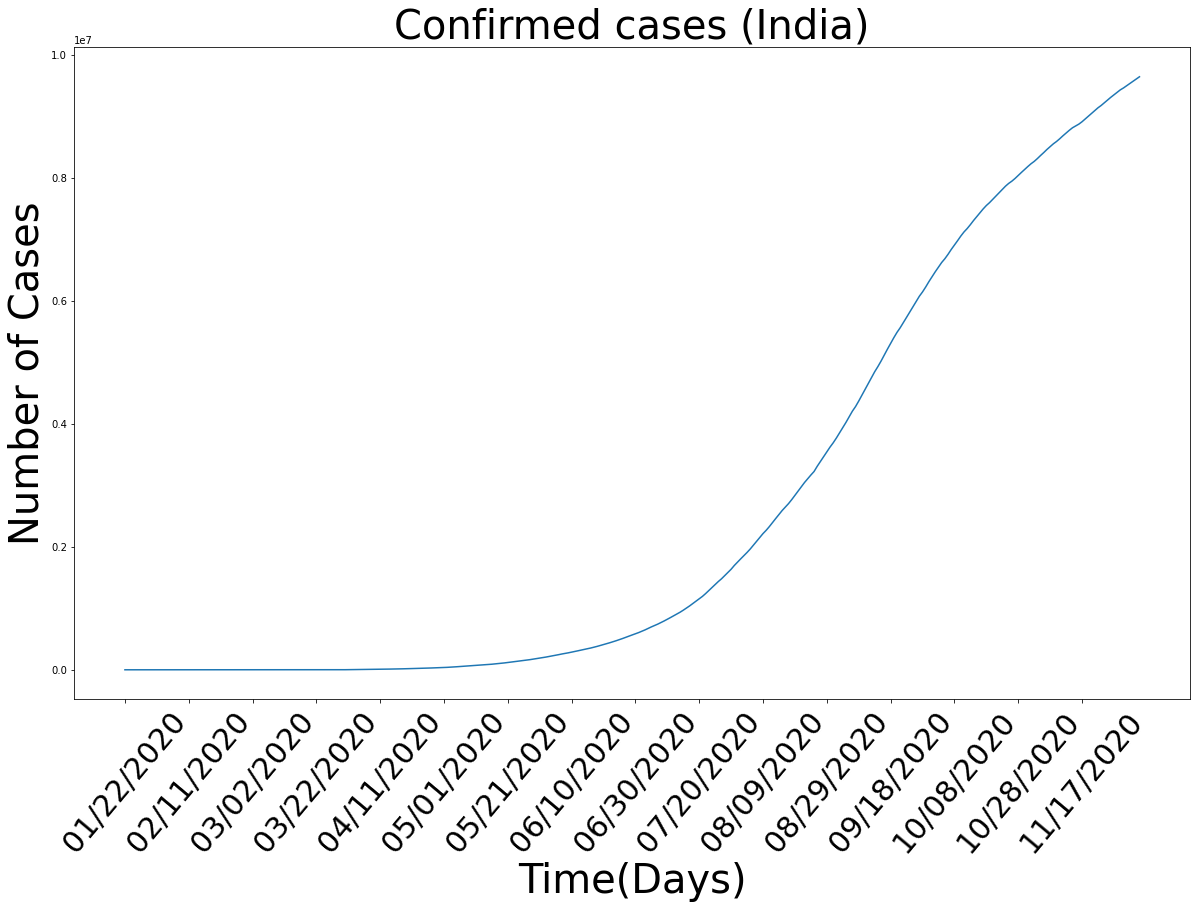

In [239]:
#Confirmed cases in India plot
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, india_confirmed_sum)
plt.title('Confirmed cases (India)', size=40)
plt.xlabel('Time(Days)', size=40)
plt.ylabel('Number of Cases', size=40)
plt.xticks(np.arange(0, len(adjusted_dates), 20), rotation=50, size=30)
plt.show()

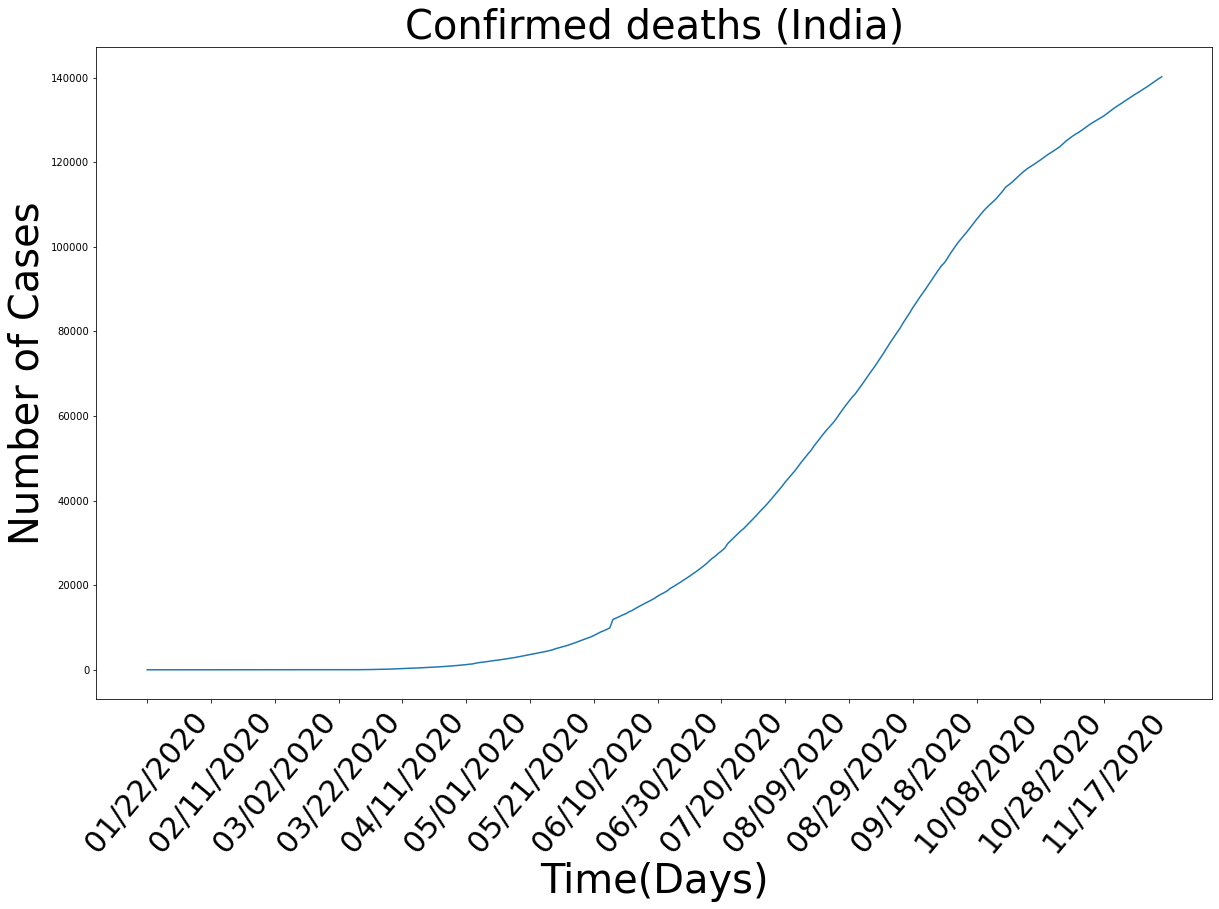

In [240]:
#Confirmed deaths in India plot
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, india_deaths_sum)
plt.title('Confirmed deaths (India)', size=40)
plt.xlabel('Time(Days)', size=40)
plt.ylabel('Number of Cases', size=40)
plt.xticks(np.arange(0, len(adjusted_dates), 20), rotation=50, size=30)
plt.show()

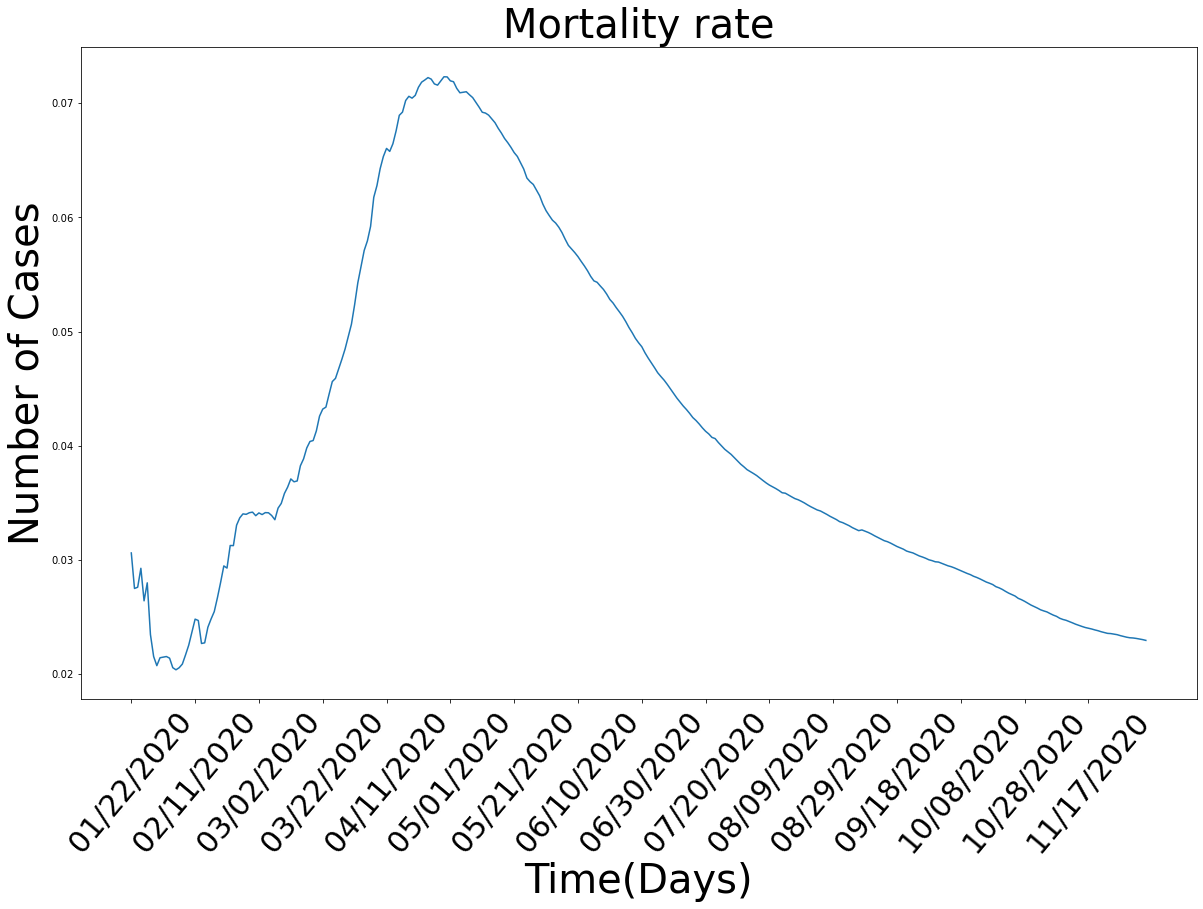

In [241]:
#Mortality rate
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, mortality_rate)
plt.title('Mortality rate', size=40)
plt.xlabel('Time(Days)', size=40)
plt.ylabel('Number of Cases', size=40)
plt.xticks(np.arange(0, len(adjusted_dates), 20), rotation=50, size=30)
plt.show()

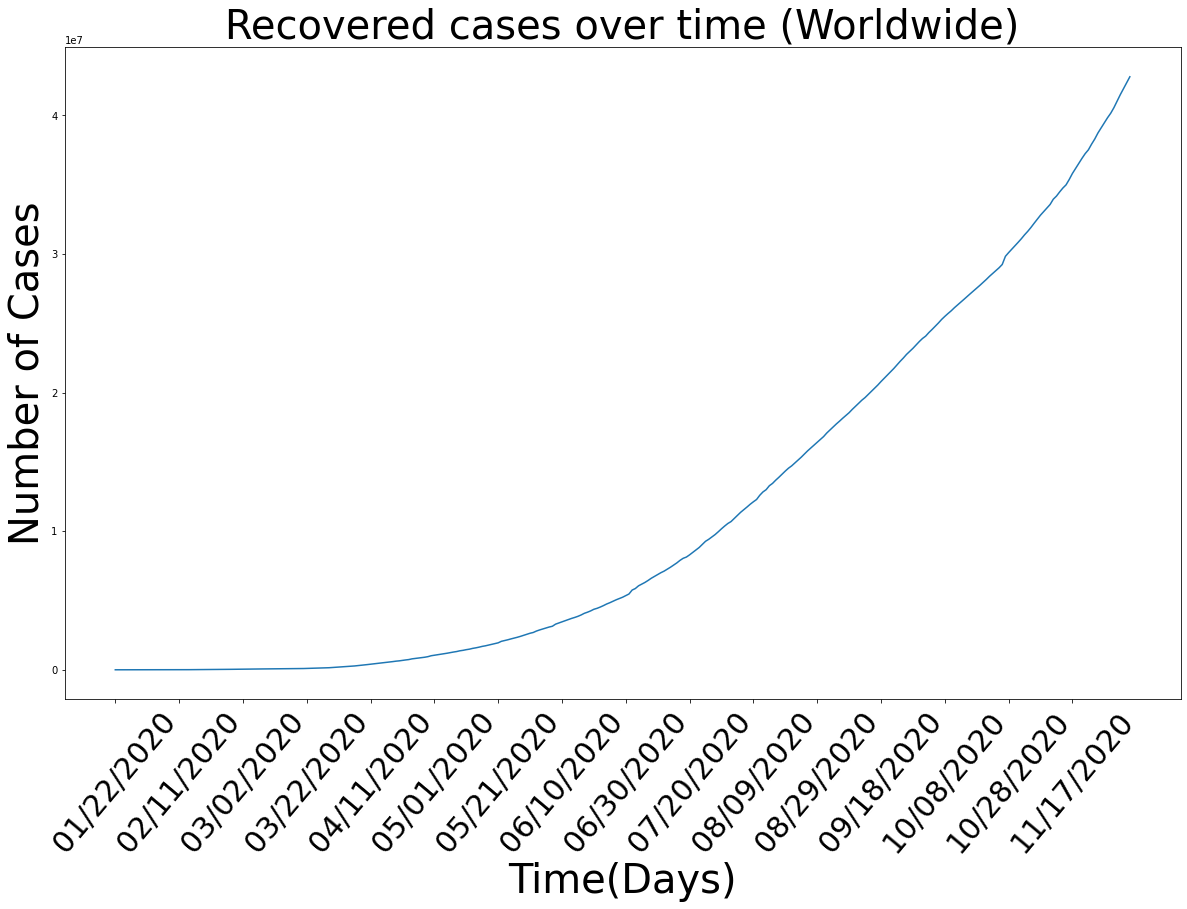

In [242]:
#Recovered cases plot
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_recovered_worldwide)
plt.title('Recovered cases over time (Worldwide)', size=40)
plt.xlabel('Time(Days)', size=40)
plt.ylabel('Number of Cases', size=40)
plt.xticks(np.arange(0, len(adjusted_dates), 20), rotation=50, size=30)
plt.show()

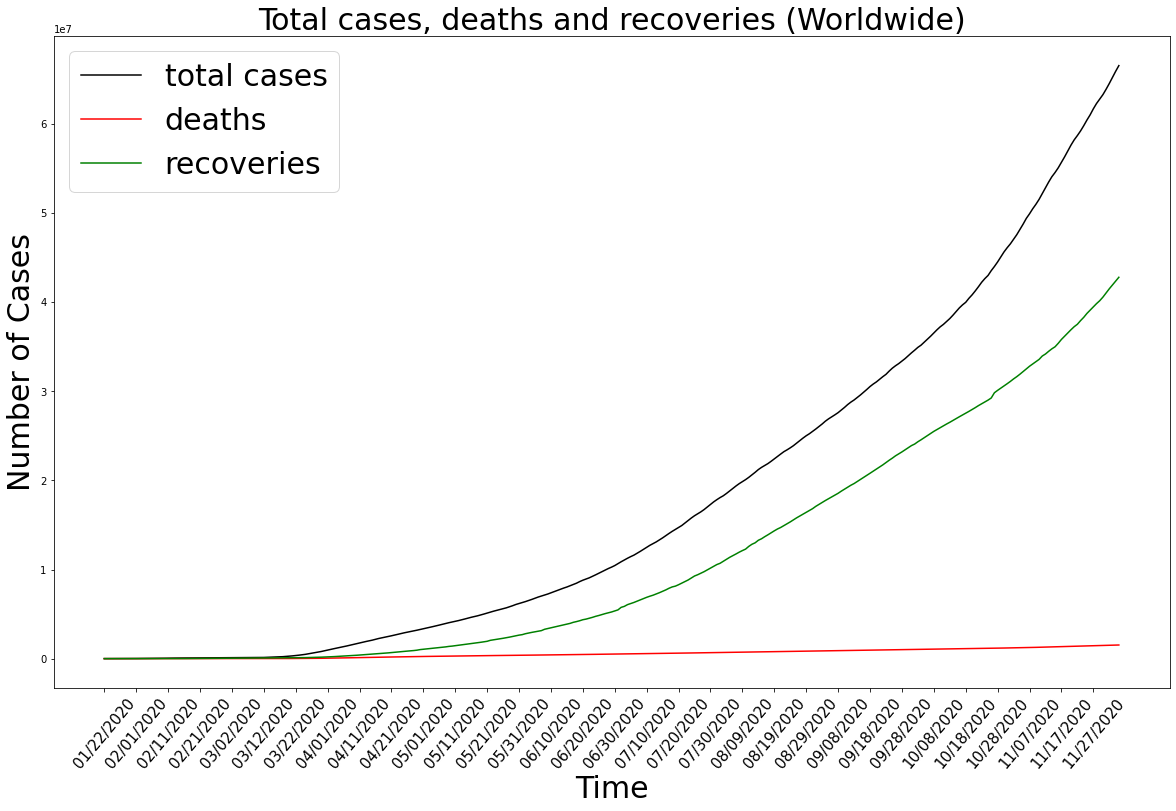

In [243]:
#Plotting number of cases, deaths and recoveries over time

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_cases_worldwide, color='black')
plt.plot(adjusted_dates, total_deaths_worldwide, color='red')
plt.plot(adjusted_dates, total_recovered_worldwide, color='green')
plt.legend(['total cases', 'deaths', 'recoveries'], loc='best', fontsize=30)
plt.title('Total cases, deaths and recoveries (Worldwide)', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(np.arange(0, len(adjusted_dates), 10), rotation=50, size=15)
plt.show()

In [244]:
days_data = []
cases_data = []
days = np.array([i for i in range(len(dates))])
for i in range(0, 4):
    cases_data.append([])
    days_data.append([])
    for c in total_cases_worldwide[i:len(total_cases_worldwide)]:
        cases_data[i].append(c)
    for d in days[i:len(days)]:
        days_data[i].append(d)
        
#Reshaping data
for i in range(1, 4):
    for j in range(0, i):
        days_data[i].append(0)
        cases_data[i].append(0)
cases_data = np.array(cases_data).reshape(-1, 1)
days_data = np.array(days_data).reshape(-1, 1)

Using Random Forest to predict the number of cases in future: Using RandomizedSearchCV

In the case of a random forest, hyperparameters include the number of decision trees in the forest and the number of features considered by each tree when splitting a node. (The parameters of a random forest are the variables and thresholds used to split each node learned during training). Scikit-Learn implements a set of sensible default hyperparameters for all models, but these are not guaranteed to be optimal for a problem. The best hyperparameters are usually impossible to determine ahead of time, and tuning a model is where machine learning turns from a science into trial-and-error based engineering.

Usually, we only have a vague idea of the best hyperparameters and thus the best approach to narrow our search is to evaluate a wide range of values for each hyperparameter. Using Scikit-Learn’s RandomizedSearchCV method, we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values.

In [245]:
#Splitting into training and test sets
X_train_confirmed,X_test_confirmed, y_train_confirmed,y_test_confirmed = train_test_split(days_data,cases_data,test_size=0.3,shuffle=False)

In [246]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_data,cases_data,
test_size=0.1,shuffle=False)

X_train_confirmed.shape, y_train_confirmed.shape, X_test_confirmed.shape, y_test_confirmed.shape

((1148, 1), (1148, 1), (128, 1), (128, 1))

In [196]:
#sqrt
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 7, 10],
           "max_features": [0.5, 1, "sqrt"]}
model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, 
                                                 random_state=42),
                                  param_distributions=rf_grid,
                                  n_iter=30,
                                  cv=5,
                                  verbose=True)

model.fit(X_train_confirmed, y_train_confirmed.ravel())

test_rfr_pred = model.predict(X_test_confirmed)
rfr_pred = rfr_model_v2.predict(future_forcast)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   43.8s finished


In [197]:
#Mean absolute error and Mean squared error (square root method)
print('MAE RFR:1', mean_absolute_error(test_rfr_pred, y_test_confirmed))
print('MSE RFR 1:', mean_squared_error(test_rfr_pred, y_test_confirmed))

MAE RFR:1 16900.68384627381
MSE RFR 1: 337003271.21044004


In [198]:
#Plotting the results

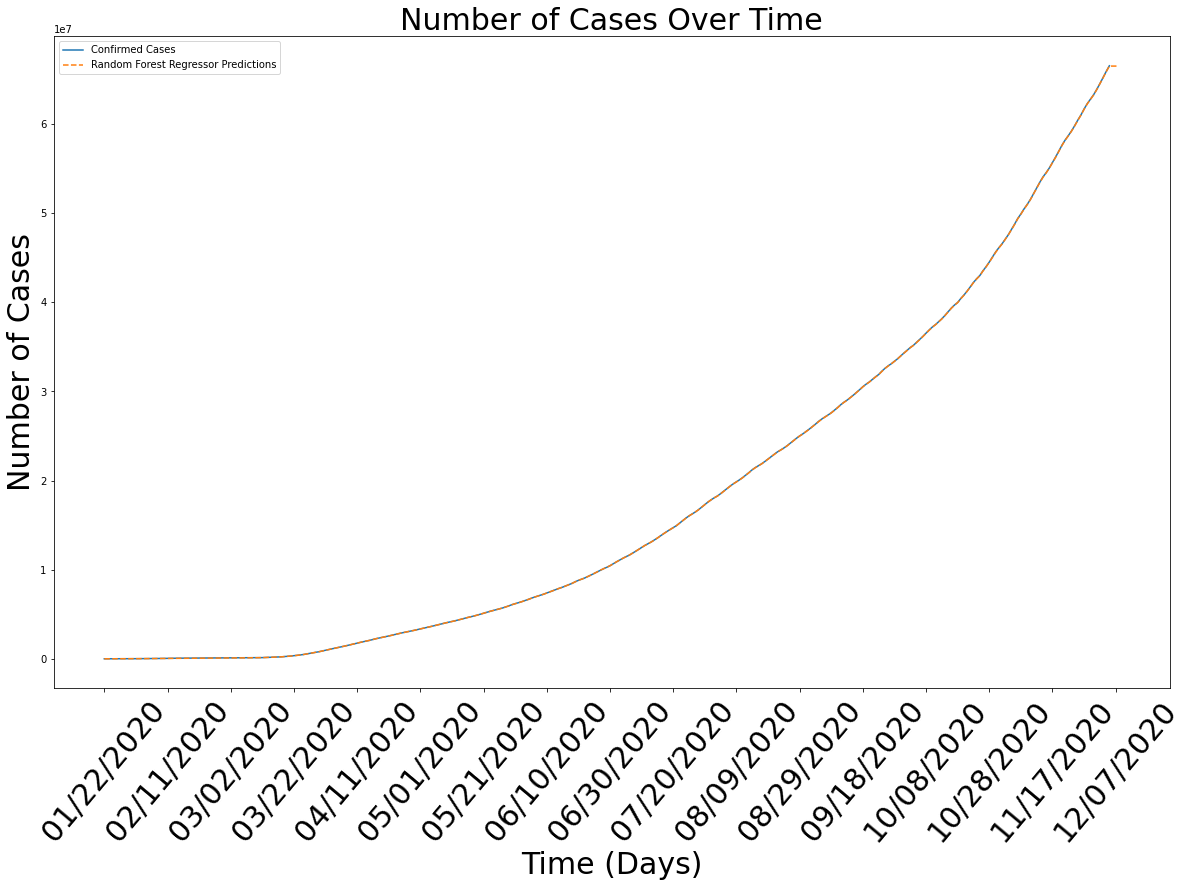

In [208]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_cases_worldwide)
plt.plot(future_forcast_dates, rfr_pred, linestyle='dashed')
plt.title('Number of Cases Over Time', size=30)
plt.xlabel('Time (Days)', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'Random Forest Regressor Predictions'])
plt.xticks(np.arange(0, len(future_forcast_dates), 20), rotation=50, size=30)
plt.show()

In [204]:
print('Random Forest Regessor prediction: ', set(zip(future_forcast_dates[-20:], rfr_pred[-20:])))

Random Forest Regessor prediction:  {('12/01/2020', 63858905.71428572), ('12/03/2020', 65189156.386813186), ('11/19/2020', 56926712.9054945), ('11/27/2020', 61655031.571428575), ('12/02/2020', 64512141.34065934), ('11/28/2020', 62262471.0), ('11/21/2020', 58183974.341758244), ('12/07/2020', 66504753.48791209), ('11/22/2020', 58671579.54395604), ('12/05/2020', 66504753.48791209), ('11/23/2020', 59191583.25384615), ('12/08/2020', 66504753.48791209), ('12/04/2020', 65871857.66263736), ('12/06/2020', 66504753.48791209), ('11/24/2020', 59774617.374725275), ('11/20/2020', 57595099.84945055), ('11/25/2020', 60407407.764835164), ('11/29/2020', 62750673.37142857), ('11/30/2020', 63255446.8978022), ('11/26/2020', 60996319.8054945)}


In [206]:
#log2
rf_grid_2 = {"n_estimators": np.arange(10, 1000, 50),
            "max_depth": [None, 3, 7, 10],
            "max_features": [0.5, 1, "log2"]}

model2 = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                         random_state=42),
                                   param_distributions=rf_grid_2,
                                   n_iter=30,
                                   cv=5,
                                   verbose=True)

model2.fit(X_train_confirmed, y_train_confirmed.ravel())

test_rfr_pred2 = model2.predict(X_test_confirmed)
rfr_pred2 = model2.predict(future_forcast)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   50.2s finished


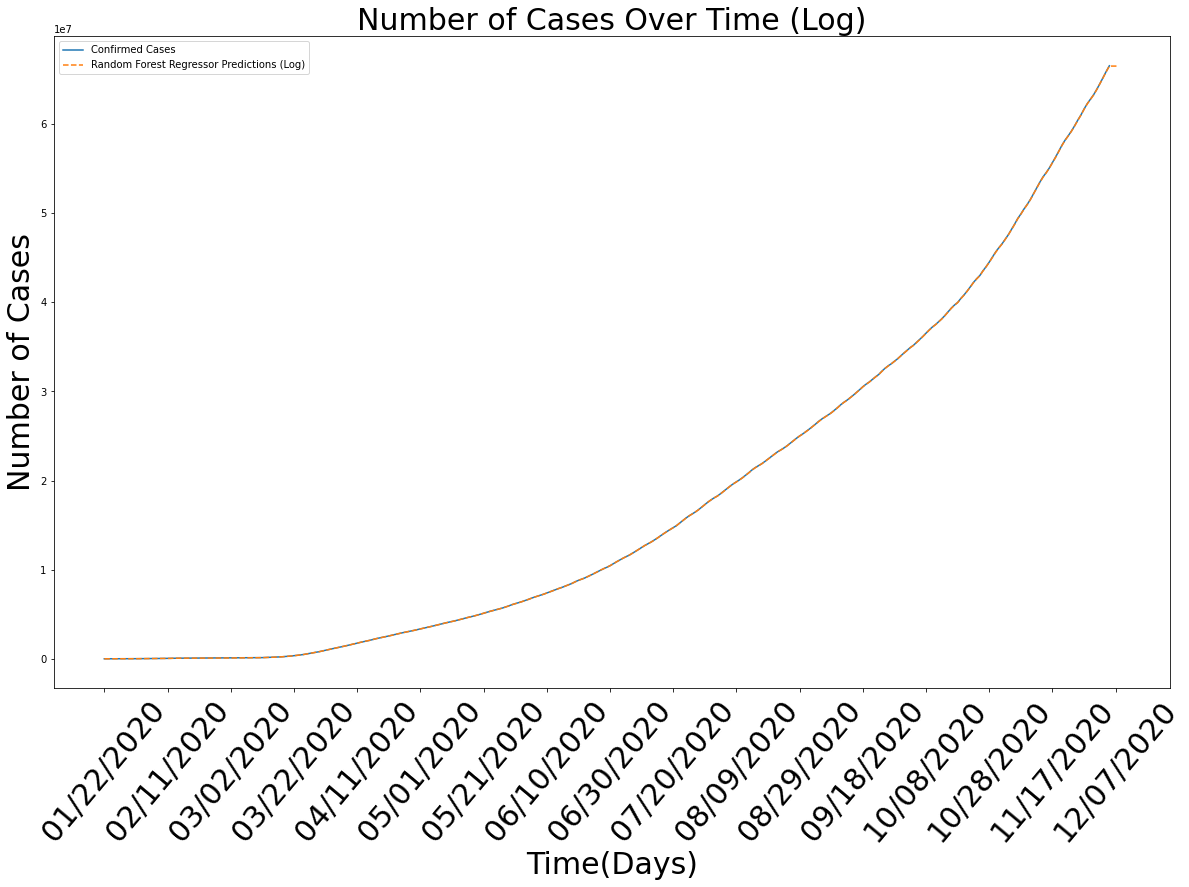

In [209]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_cases_worldwide)
plt.plot(future_forcast_dates, rfr_pred2, linestyle='dashed')
plt.title('Number of Cases Over Time (Log)', size=30)
plt.xlabel('Time(Days)', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'Random Forest Regressor Predictions (Log)'])
plt.xticks(np.arange(0, len(future_forcast_dates), 20), rotation=50, size=30)
plt.show()

In [210]:
#Mean absolute error and Mean squared error (log method)
print('MAE RFR 2:', mean_absolute_error(test_rfr_pred2, y_test_confirmed))
print('MSE RFR 2:', mean_squared_error(test_rfr_pred2, y_test_confirmed))

MAE RFR 2: 16931.672103629706
MSE RFR 2: 337053551.066033
